출처 : 
- 딥러닝을 위한 최적화와 수치해석 (황윤구, 양한별, 남가람북스) 
- https://github.com/DNRY/dlopt

# 5장. 딥러닝에 필요한 최적화 이론

## 5.2 최적화 문제의 출발

#### 제곱값의 합을 이용한 선형 회귀

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# show retina display properly
%config InlineBackend.figure_format = 'retina'

### $L_{2}$ 손실 함수 (Mean Squared Error)

**선형 모델:**
$$\hat{y} = wx + b$$

여기서:
- $w$: 가중치 (weight)
- $b$: 편향 (bias)
- $x$: 입력 변수
- $\hat{y}$: 예측값

**L2 손실 함수 (제곱 오차의 합):**
$$L_2(w, b) = \sum_{i=1}^{n} (\hat{y}_i - y_i)^2 = \sum_{i=1}^{n} (wx_i + b - y_i)^2$$

여기서:
- $y_i$: 실제값 (ground truth)
- $n$: 데이터 포인트의 개수
- $(\hat{y}_i - y_i)^2$: 각 데이터 포인트의 제곱 오차

**시각화 특징:**
- 사각형의 **면적** = $(wx + b - y)^2$ (제곱 오차)
- 전체 손실 = 모든 사각형 면적의 합
- 목표: $L_2(w, b)$를 최소화하는 최적의 $w$와 $b$ 찾기

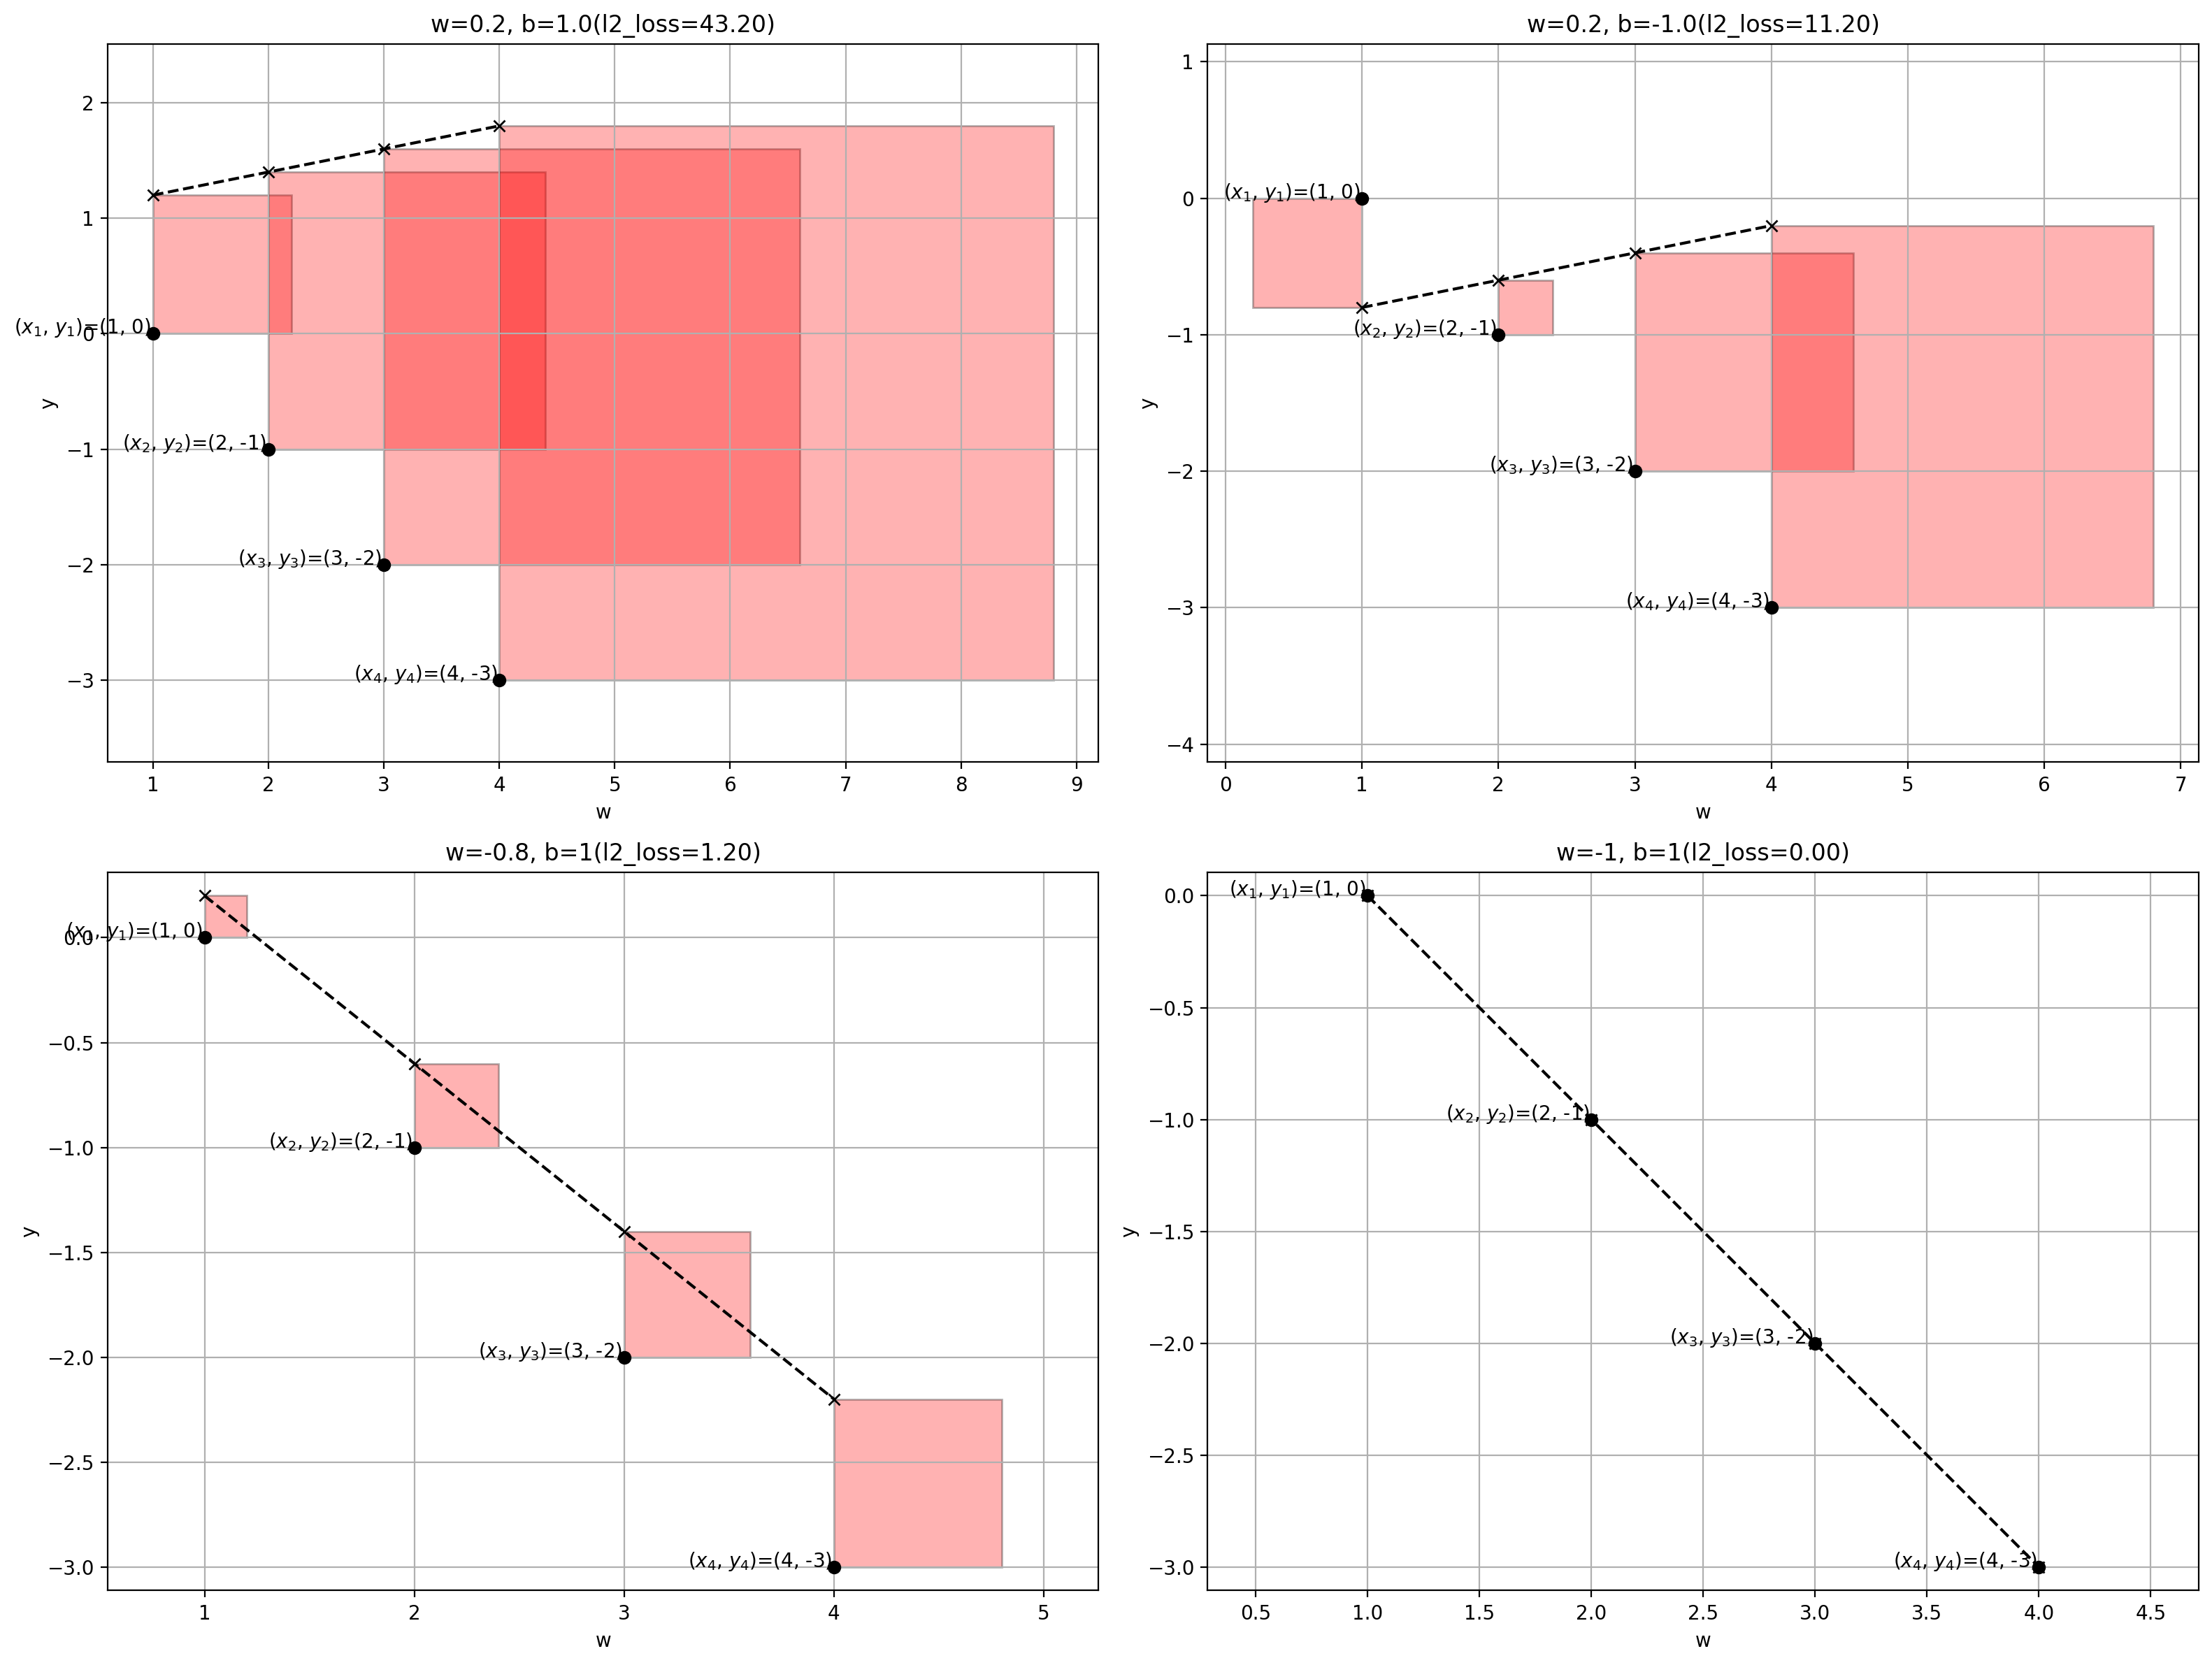

In [ ]:
def l2_loss(w,b,x,y):
    y_hat = w * x + b
    return np.sum(np.square( y_hat - y))

def visualize_l2(w, b, x_train, y_train, loss):
    
    loss_name = loss.__name__
    
    plt.plot(x_train, y_train, 'ok')
    plt.plot(x_train, w * x_train + b, '--kx')
    
    [plt.text(x, y, '($x_{0}$, $y_{0}$)=({1}, {2}) '.format(k, x, y), 
              horizontalalignment='right') for k, (x, y) in enumerate(zip(x_train, y_train),1)]
    
    
    currentAxis = plt.gca()
    
    for xx,yy in zip(x_train, y_train):
        currentAxis.add_patch(Rectangle( (xx, yy), (w * xx + b - yy), (w * xx + b - yy), 
                                        alpha=0.3, facecolor='red', edgecolor='k'))
        
    plt.grid()
    plt.axis('equal')
    plt.xlabel('w')
    plt.ylabel('y')
    plt.title("w={}, b={}({}={:1.2f})".format(w, b, loss_name,loss(w, b, x_train, y_train)))

x_train = np.array([1, 2, 3, 4])
y_train = np.array([0, -1, -2, -3])

plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
visualize_l2(0.2, 1.0, x_train, y_train, l2_loss)
plt.subplot(2,2,2)
visualize_l2(0.2, -1.0, x_train, y_train, l2_loss)
plt.subplot(2,2,3)
visualize_l2(-0.8, 1, x_train, y_train, l2_loss)
plt.subplot(2,2,4)
visualize_l2(-1, 1, x_train, y_train, l2_loss)
plt.tight_layout()
plt.show(block=False)

### MAE 활용 선형 회귀

**선형 모델:**
$$\hat{y} = wx + b$$

여기서:
- $w$: 가중치 (weight)
- $b$: 편향 (bias)
- $x$: 입력 변수
- $\hat{y}$: 예측값

**L1 손실 함수 (절댓값 오차의 합):**
$$L_1(w, b) = \sum_{i=1}^{n} |\hat{y}_i - y_i| = \sum_{i=1}^{n} |wx_i + b - y_i|$$

여기서:
- $y_i$: 실제값 (ground truth)
- $n$: 데이터 포인트의 개수
- $|\hat{y}_i - y_i|$: 각 데이터 포인트의 절댓값 오차

**특징:**
- 각 데이터 포인트의 오차의 절댓값을 모두 더한 값이 손실이 됨
- 이상치(outlier)에 덜 민감하여, 강건한 회귀에 사용됨
- 목표: $L_1(w, b)$를 최소화하는 최적의 $w$와 $b$ 찾기

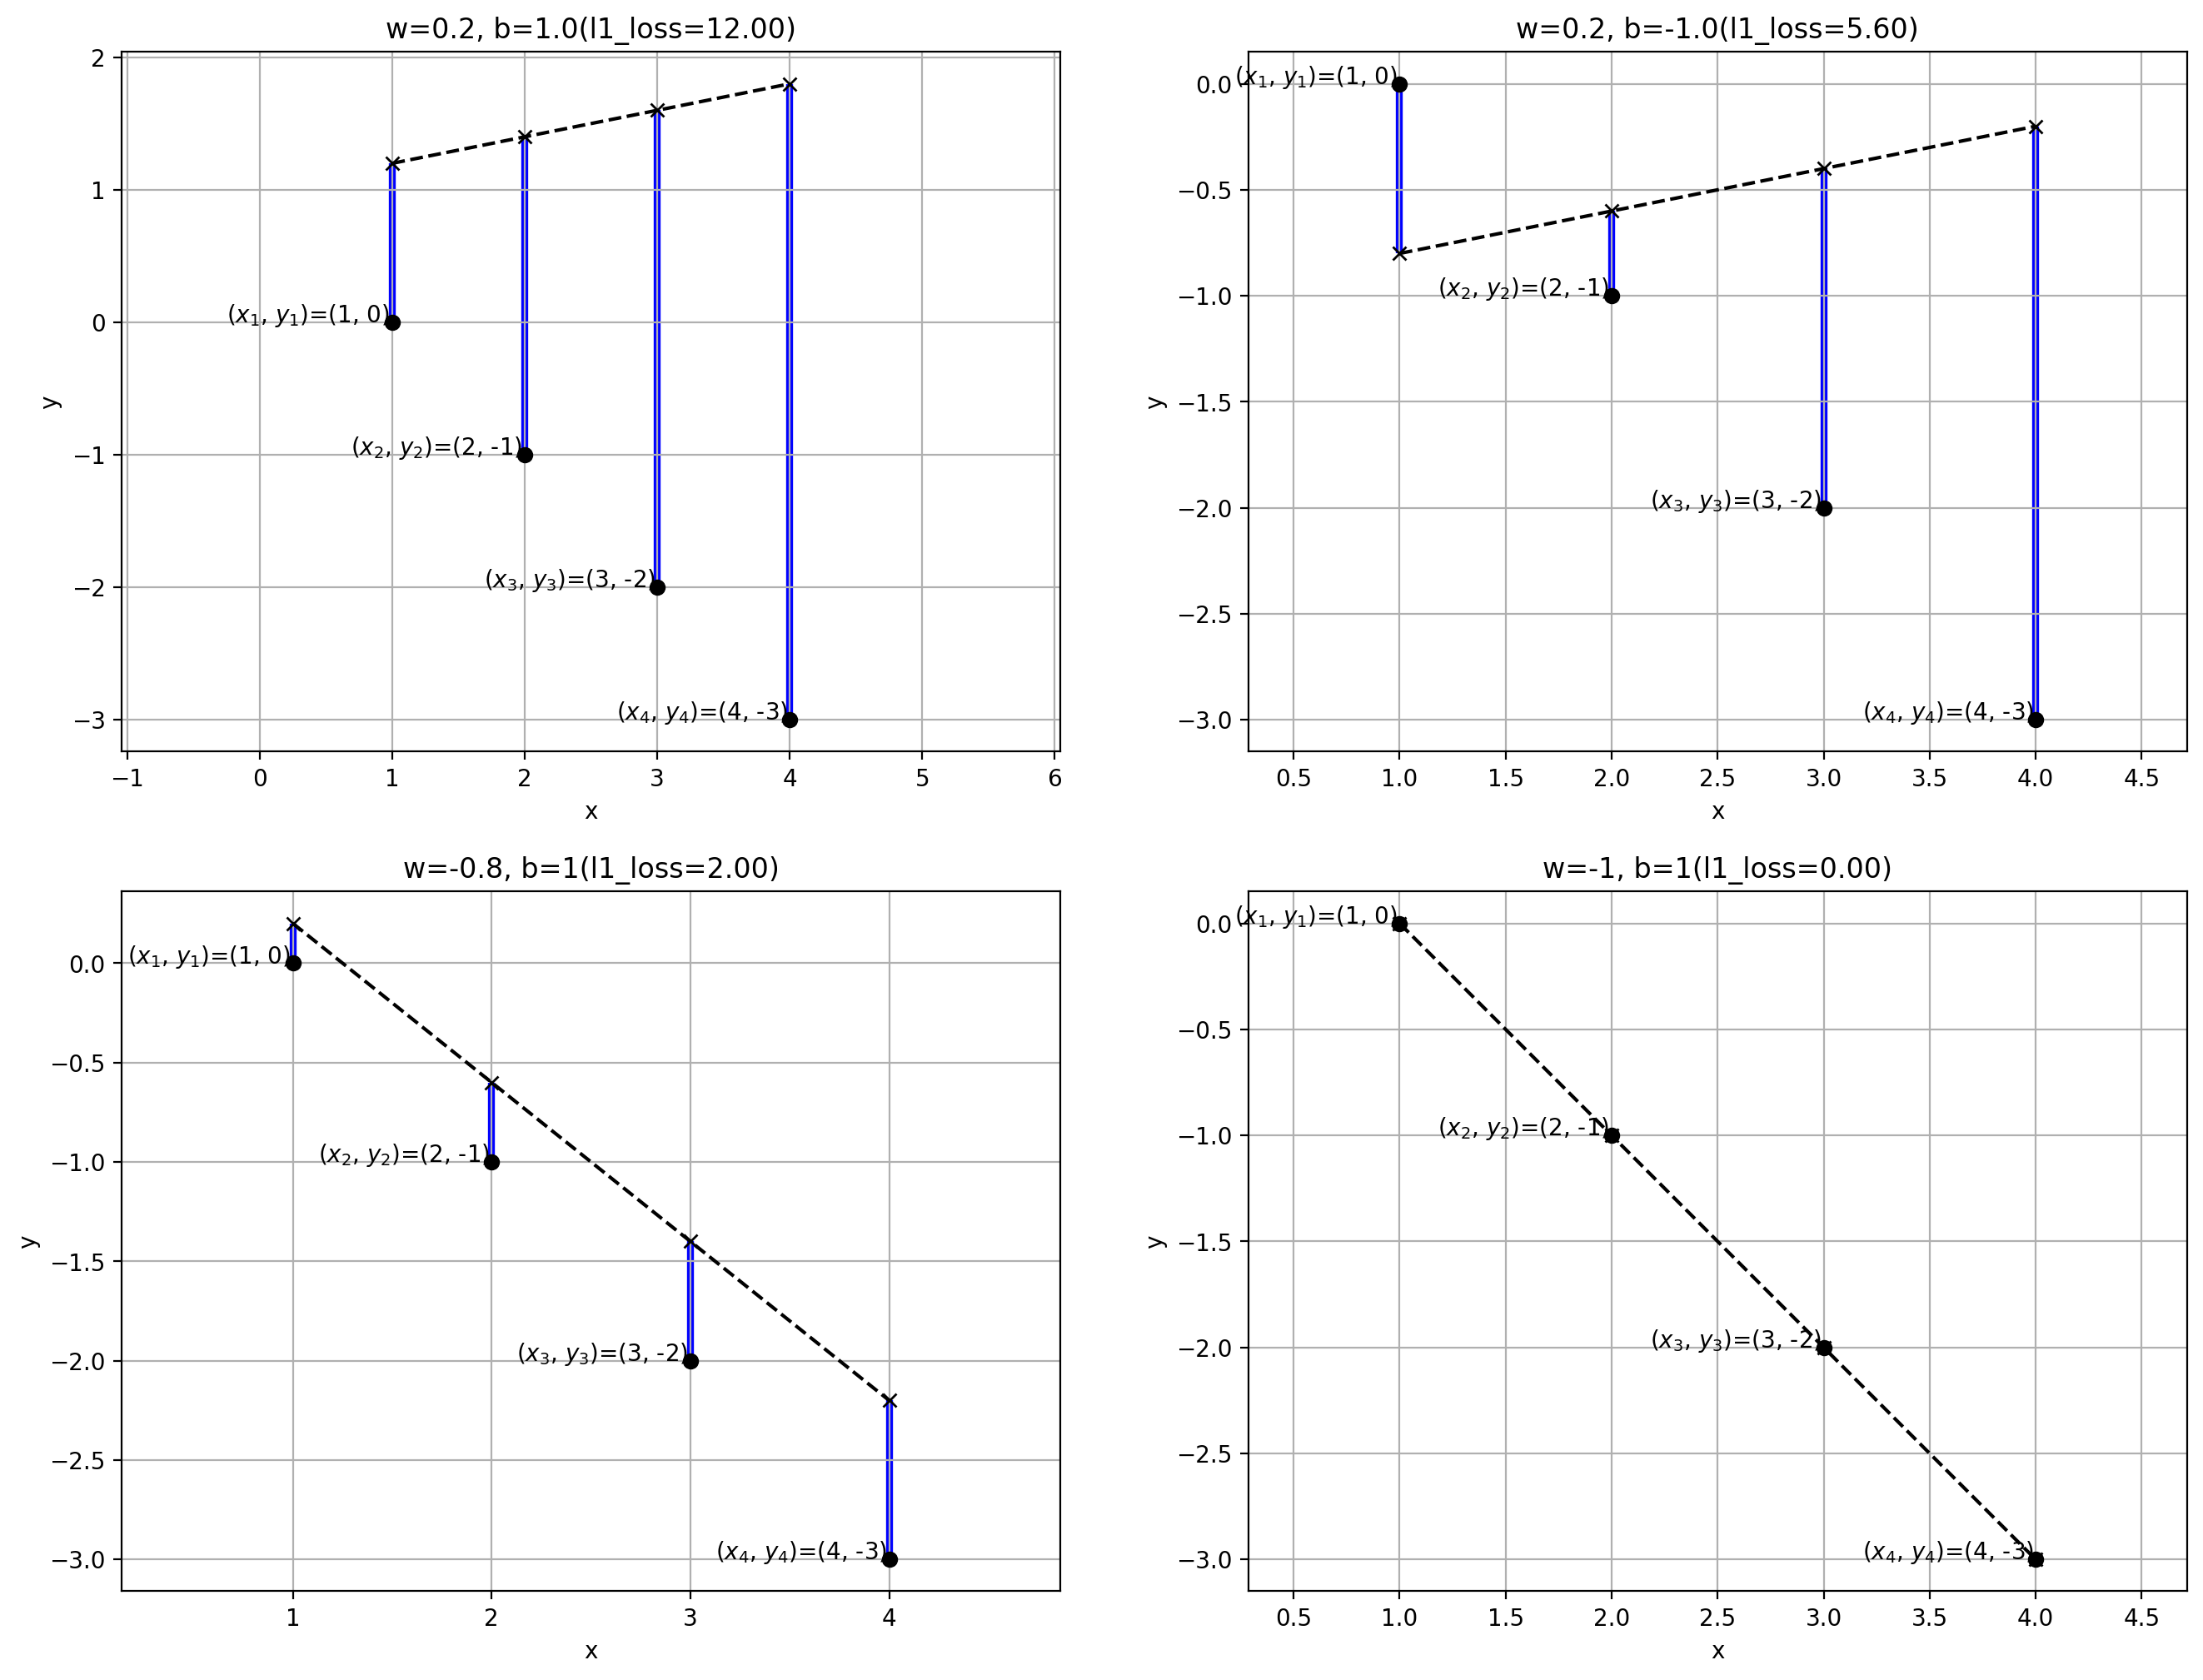

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def l1_loss(w,b,x,y):
    return np.sum(np.abs(w*x + b - y))

def visualize_l1(w, b, x_train, y_train, loss):
    loss_name = loss.__name__
    plt.plot(x_train, y_train, 'ok')
    plt.plot(x_train, w * x_train + b, '--kx')
    [plt.text(x, y, '($x_{0}$, $y_{0}$)=({1}, {2}) '.format(k, x, y),
              horizontalalignment='right') for k, (x, y) in enumerate(zip(x_train, y_train),1)] 
    
    currentAxis = plt.gca()

    for xx,yy in zip(x_train, y_train):
        currentAxis.add_patch(Rectangle((xx, yy), 0, w * xx + b - yy, 
                                        alpha=1.0, facecolor='b', edgecolor='b', linewidth=3))
    plt.grid()
    plt.axis('equal')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("w={}, b={}({}={:1.2f})".format(w,b,loss_name,loss(w,b,x_train,y_train)))

x_train = np.array([1, 2, 3, 4])
y_train = np.array([0, -1, -2, -3])

plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
visualize_l1(0.2, 1.0, x_train, y_train, l1_loss)
plt.subplot(2,2,2)
visualize_l1(0.2, -1.0, x_train, y_train, l1_loss)
plt.subplot(2,2,3)
visualize_l1(-0.8, 1, x_train, y_train, l1_loss)
plt.subplot(2,2,4)
visualize_l1(-1, 1, x_train, y_train, l1_loss)
plt.show(block=False)